In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from rl.agents.dqn import *
from rl.policy import *
from rl.memory import *

In [4]:
import gym
from gym import Env

In [5]:
env = gym.make('MountainCar-v0')
env.seed(123)
env.reset()
action_num = env.action_space.n
observe_shape = env.observation_space.shape
window_length = 1

In [29]:
model_x = Input((window_length, )+observe_shape)
model_y = Flatten()(model_x)
model_y = Dense(16)(model_y)
model_y = Dense(16)(model_y)
model_y = Dense(16)(model_y)
model_y = Dense(action_num)(model_y)
model = Model(model_x, model_y)

In [30]:
memory = SequentialMemory(limit=200000, window_length=window_length)
policy = EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=action_num, memory=memory, nb_steps_warmup=1000,
               target_model_update=0.05, policy=policy)

In [31]:
dqn.compile(Adam(), metrics=['mse'])

In [32]:
hist = dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)
env.render()

Training for 100000 steps ...
   200/100000: episode: 1, duration: 0.570s, episode steps: 200, steps per second: 351, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.080 [0.000, 2.000], mean observation: -0.336 [-0.857, 0.015], loss: --, mean_squared_error: --, mean_q: --
   400/100000: episode: 2, duration: 0.258s, episode steps: 200, steps per second: 775, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.135 [0.000, 2.000], mean observation: -0.322 [-0.700, 0.004], loss: --, mean_squared_error: --, mean_q: --
   600/100000: episode: 3, duration: 0.257s, episode steps: 200, steps per second: 777, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.090 [0.000, 2.000], mean observation: -0.338 [-0.978, 0.023], loss: --, mean_squared_error: --, mean_q: --
   800/100000: episode: 4, duration: 0.271s, episode steps: 200, steps per second: 737, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.00

  5781/100000: episode: 29, duration: 2.009s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.770 [0.000, 2.000], mean observation: -0.281 [-0.855, 0.036], loss: 9.633472, mean_squared_error: 2207.810059, mean_q: -56.815933
  5981/100000: episode: 30, duration: 2.022s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.670 [0.000, 2.000], mean observation: -0.286 [-0.752, 0.027], loss: 8.459774, mean_squared_error: 2252.182861, mean_q: -57.488346
  6181/100000: episode: 31, duration: 2.016s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.400 [0.000, 2.000], mean observation: -0.333 [-1.200, 0.042], loss: 7.678733, mean_squared_error: 2246.707275, mean_q: -57.385670
  6381/100000: episode: 32, duration: 2.022s, episode steps: 200, steps per second: 99, episode reward: -200

 11356/100000: episode: 57, duration: 2.054s, episode steps: 200, steps per second: 97, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.990 [0.000, 2.000], mean observation: -0.268 [-0.773, 0.032], loss: 10.229617, mean_squared_error: 2314.282471, mean_q: -58.439907
 11556/100000: episode: 58, duration: 2.039s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.670 [0.000, 2.000], mean observation: -0.298 [-0.966, 0.032], loss: 9.023934, mean_squared_error: 2312.299561, mean_q: -58.470272
 11756/100000: episode: 59, duration: 2.013s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.805 [0.000, 2.000], mean observation: -0.281 [-0.942, 0.025], loss: 9.749804, mean_squared_error: 2287.154541, mean_q: -58.093117
 11956/100000: episode: 60, duration: 2.051s, episode steps: 200, steps per second: 98, episode reward: -200

 16956/100000: episode: 85, duration: 2.027s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.760 [0.000, 2.000], mean observation: -0.288 [-0.814, 0.020], loss: 6.422278, mean_squared_error: 2362.807861, mean_q: -59.183693
 17156/100000: episode: 86, duration: 2.082s, episode steps: 200, steps per second: 96, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.855 [0.000, 2.000], mean observation: -0.294 [-1.058, 0.039], loss: 9.758695, mean_squared_error: 2364.176514, mean_q: -59.113007
 17356/100000: episode: 87, duration: 2.107s, episode steps: 200, steps per second: 95, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.825 [0.000, 2.000], mean observation: -0.272 [-0.772, 0.016], loss: 8.818423, mean_squared_error: 2302.399414, mean_q: -58.313183
 17556/100000: episode: 88, duration: 2.033s, episode steps: 200, steps per second: 98, episode reward: -200.

 22556/100000: episode: 113, duration: 1.994s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.740 [0.000, 2.000], mean observation: -0.303 [-1.200, 0.049], loss: 8.535691, mean_squared_error: 2297.746582, mean_q: -58.177258
 22756/100000: episode: 114, duration: 1.995s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.880 [0.000, 2.000], mean observation: -0.286 [-1.041, 0.030], loss: 7.893160, mean_squared_error: 2283.447266, mean_q: -58.085159
 22956/100000: episode: 115, duration: 2.018s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.020 [0.000, 2.000], mean observation: -0.250 [-0.785, 0.022], loss: 10.438267, mean_squared_error: 2256.556152, mean_q: -57.728565
 23156/100000: episode: 116, duration: 2.066s, episode steps: 200, steps per second: 97, episode reward

 28156/100000: episode: 141, duration: 1.999s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.290 [0.000, 2.000], mean observation: -0.249 [-1.038, 0.026], loss: 8.121136, mean_squared_error: 2129.552246, mean_q: -56.094765
 28356/100000: episode: 142, duration: 2.016s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.780 [0.000, 2.000], mean observation: -0.277 [-0.784, 0.021], loss: 8.675707, mean_squared_error: 2134.185791, mean_q: -56.146950
 28556/100000: episode: 143, duration: 1.988s, episode steps: 200, steps per second: 101, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.860 [0.000, 2.000], mean observation: -0.273 [-0.699, 0.020], loss: 8.111657, mean_squared_error: 2136.413086, mean_q: -56.295761
 28756/100000: episode: 144, duration: 2.007s, episode steps: 200, steps per second: 100, episode reward

 33756/100000: episode: 169, duration: 2.024s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.330 [0.000, 2.000], mean observation: -0.222 [-0.919, 0.036], loss: 10.152372, mean_squared_error: 2355.977295, mean_q: -58.891685
 33956/100000: episode: 170, duration: 2.041s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.010 [0.000, 2.000], mean observation: -0.266 [-0.779, 0.023], loss: 10.063325, mean_squared_error: 2315.597168, mean_q: -58.528587
 34156/100000: episode: 171, duration: 2.009s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.095 [0.000, 2.000], mean observation: -0.250 [-0.758, 0.021], loss: 8.049807, mean_squared_error: 2258.192383, mean_q: -57.756187
 34356/100000: episode: 172, duration: 2.041s, episode steps: 200, steps per second: 98, episode reward

 39356/100000: episode: 197, duration: 2.011s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.870 [0.000, 2.000], mean observation: -0.258 [-0.943, 0.045], loss: 8.564527, mean_squared_error: 2344.207764, mean_q: -58.874393
 39556/100000: episode: 198, duration: 2.000s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.080 [0.000, 2.000], mean observation: -0.245 [-1.017, 0.221], loss: 6.144185, mean_squared_error: 2410.752441, mean_q: -59.829239
 39756/100000: episode: 199, duration: 2.007s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.010 [0.000, 2.000], mean observation: -0.247 [-1.200, 0.346], loss: 9.311605, mean_squared_error: 2436.407715, mean_q: -59.932785
 39956/100000: episode: 200, duration: 2.057s, episode steps: 200, steps per second: 97, episode reward:

 44956/100000: episode: 225, duration: 2.017s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.995 [0.000, 2.000], mean observation: -0.268 [-1.054, 0.229], loss: 8.263647, mean_squared_error: 2406.404053, mean_q: -59.661621
 45156/100000: episode: 226, duration: 2.025s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.860 [0.000, 2.000], mean observation: -0.263 [-1.151, 0.050], loss: 8.603748, mean_squared_error: 2404.125000, mean_q: -59.624947
 45356/100000: episode: 227, duration: 2.016s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.880 [0.000, 2.000], mean observation: -0.271 [-0.938, 0.042], loss: 7.026758, mean_squared_error: 2436.347900, mean_q: -60.087646
 45556/100000: episode: 228, duration: 2.008s, episode steps: 200, steps per second: 100, episode reward: 

 50515/100000: episode: 253, duration: 2.005s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.940 [0.000, 2.000], mean observation: -0.261 [-0.772, 0.020], loss: 8.017023, mean_squared_error: 2188.468994, mean_q: -56.968063
 50715/100000: episode: 254, duration: 2.000s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.820 [0.000, 2.000], mean observation: -0.287 [-0.923, 0.028], loss: 7.223371, mean_squared_error: 2241.645996, mean_q: -57.604279
 50915/100000: episode: 255, duration: 2.003s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.200 [0.000, 2.000], mean observation: -0.252 [-0.758, 0.028], loss: 8.627160, mean_squared_error: 2266.666504, mean_q: -57.972977
 51115/100000: episode: 256, duration: 2.045s, episode steps: 200, steps per second: 98, episode reward

 56115/100000: episode: 281, duration: 2.050s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.295 [0.000, 2.000], mean observation: -0.253 [-0.919, 0.031], loss: 7.453273, mean_squared_error: 2251.529053, mean_q: -57.763161
 56315/100000: episode: 282, duration: 2.035s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.005 [0.000, 2.000], mean observation: -0.283 [-1.095, 0.044], loss: 7.049463, mean_squared_error: 2282.312256, mean_q: -58.148746
 56515/100000: episode: 283, duration: 2.016s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.720 [0.000, 2.000], mean observation: -0.284 [-1.200, 0.211], loss: 8.321385, mean_squared_error: 2274.273682, mean_q: -57.939743
 56715/100000: episode: 284, duration: 2.112s, episode steps: 200, steps per second: 95, episode reward: -

 61715/100000: episode: 309, duration: 2.042s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.045 [0.000, 2.000], mean observation: -0.255 [-1.005, 0.046], loss: 7.886537, mean_squared_error: 2349.187744, mean_q: -58.959473
 61915/100000: episode: 310, duration: 1.988s, episode steps: 200, steps per second: 101, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.150 [0.000, 2.000], mean observation: -0.248 [-0.825, 0.030], loss: 8.070141, mean_squared_error: 2344.855713, mean_q: -58.879131
 62115/100000: episode: 311, duration: 2.027s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.745 [0.000, 2.000], mean observation: -0.295 [-0.955, 0.031], loss: 12.448368, mean_squared_error: 2252.385254, mean_q: -57.571621
 62315/100000: episode: 312, duration: 2.031s, episode steps: 200, steps per second: 98, episode reward:

 67315/100000: episode: 337, duration: 2.016s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.910 [0.000, 2.000], mean observation: -0.235 [-1.200, 0.090], loss: 8.816702, mean_squared_error: 2518.903809, mean_q: -60.991318
 67515/100000: episode: 338, duration: 2.004s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.895 [0.000, 2.000], mean observation: -0.278 [-1.058, 0.041], loss: 8.202690, mean_squared_error: 2499.711182, mean_q: -60.792500
 67715/100000: episode: 339, duration: 2.002s, episode steps: 200, steps per second: 100, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.710 [0.000, 2.000], mean observation: -0.276 [-0.735, 0.019], loss: 8.878331, mean_squared_error: 2461.158691, mean_q: -60.335995
 67915/100000: episode: 340, duration: 2.042s, episode steps: 200, steps per second: 98, episode reward:

 72910/100000: episode: 365, duration: 2.092s, episode steps: 200, steps per second: 96, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.105 [0.000, 2.000], mean observation: -0.256 [-0.856, 0.026], loss: 6.571412, mean_squared_error: 2351.359619, mean_q: -59.041630
 73110/100000: episode: 366, duration: 2.066s, episode steps: 200, steps per second: 97, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.775 [0.000, 2.000], mean observation: -0.280 [-0.759, 0.020], loss: 6.937117, mean_squared_error: 2402.897461, mean_q: -59.643673
 73310/100000: episode: 367, duration: 2.043s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.085 [0.000, 2.000], mean observation: -0.251 [-0.686, 0.018], loss: 9.740968, mean_squared_error: 2413.763428, mean_q: -59.815697
 73510/100000: episode: 368, duration: 2.150s, episode steps: 200, steps per second: 93, episode reward: -

 78486/100000: episode: 393, duration: 2.023s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.275 [0.000, 2.000], mean observation: -0.240 [-0.774, 0.030], loss: 6.682491, mean_squared_error: 2227.978271, mean_q: -57.497196
 78686/100000: episode: 394, duration: 2.033s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.300 [0.000, 2.000], mean observation: -0.231 [-0.892, 0.036], loss: 5.588730, mean_squared_error: 2329.064941, mean_q: -58.778927
 78886/100000: episode: 395, duration: 2.049s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.080 [0.000, 2.000], mean observation: -0.262 [-0.773, 0.033], loss: 5.846871, mean_squared_error: 2369.368896, mean_q: -59.287479
 79086/100000: episode: 396, duration: 2.042s, episode steps: 200, steps per second: 98, episode reward: -

 84086/100000: episode: 421, duration: 2.037s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.055 [0.000, 2.000], mean observation: -0.259 [-1.186, 0.026], loss: 9.059814, mean_squared_error: 2400.937500, mean_q: -59.579071
 84286/100000: episode: 422, duration: 2.027s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.070 [0.000, 2.000], mean observation: -0.262 [-0.782, 0.014], loss: 7.954057, mean_squared_error: 2440.510986, mean_q: -60.178513
 84486/100000: episode: 423, duration: 2.143s, episode steps: 200, steps per second: 93, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.635 [0.000, 2.000], mean observation: -0.286 [-0.816, 0.024], loss: 8.907812, mean_squared_error: 2443.375977, mean_q: -60.192192
 84686/100000: episode: 424, duration: 2.098s, episode steps: 200, steps per second: 95, episode reward: -

 89686/100000: episode: 449, duration: 2.489s, episode steps: 200, steps per second: 80, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.220 [0.000, 2.000], mean observation: -0.245 [-0.687, 0.020], loss: 5.672208, mean_squared_error: 2353.608887, mean_q: -59.129669
 89886/100000: episode: 450, duration: 2.493s, episode steps: 200, steps per second: 80, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.870 [0.000, 2.000], mean observation: -0.271 [-0.734, 0.021], loss: 10.388794, mean_squared_error: 2315.459961, mean_q: -58.472191
 90086/100000: episode: 451, duration: 2.496s, episode steps: 200, steps per second: 80, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.735 [0.000, 2.000], mean observation: -0.303 [-1.135, 0.044], loss: 10.089344, mean_squared_error: 2279.269287, mean_q: -58.093826
 90286/100000: episode: 452, duration: 2.193s, episode steps: 200, steps per second: 91, episode reward:

 95286/100000: episode: 477, duration: 2.165s, episode steps: 200, steps per second: 92, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.000 [0.000, 2.000], mean observation: -0.268 [-0.869, 0.029], loss: 10.590961, mean_squared_error: 2356.095215, mean_q: -59.004627
 95486/100000: episode: 478, duration: 2.027s, episode steps: 200, steps per second: 99, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.205 [0.000, 2.000], mean observation: -0.254 [-0.769, 0.022], loss: 7.796537, mean_squared_error: 2341.018799, mean_q: -58.932598
 95686/100000: episode: 479, duration: 2.048s, episode steps: 200, steps per second: 98, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.005 [0.000, 2.000], mean observation: -0.265 [-0.861, 0.037], loss: 9.761810, mean_squared_error: 2351.528809, mean_q: -59.009384
 95886/100000: episode: 480, duration: 2.115s, episode steps: 200, steps per second: 95, episode reward: 

In [33]:
env.render(close=True)

In [ ]:
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: -200.000, steps: 200


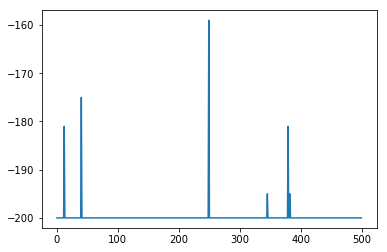

In [34]:
ax = plt.subplot(111)
ax.plot(hist.history.get('episode_reward'))